# Case MGOC20

**Goal**  
The goal of the case is too forecast passenger arrivals. 

**Data**  
The Data given is a processed dataset.
- Form: Tabular Form
- Index: Day
- columns: Two hour shift

# Imports


In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels

# Data Processing

In [3]:
df = pd.read_excel("CaseData.xls", index_col=0)

In [17]:
df.shape

(30, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   4-6 AM     30 non-null     int64
 1   6-8 AM     30 non-null     int64
 2   8-10 AM    30 non-null     int64
 3   10-noon    30 non-null     int64
 4   noon-2 PM  30 non-null     int64
 5   2-4 PM     30 non-null     int64
 6   4-6 PM     30 non-null     int64
 7   6-8 PM     30 non-null     int64
 8   8-10 PM    30 non-null     int64
 9   Year       30 non-null     int64
dtypes: int64(10)
memory usage: 2.6 KB


In [22]:
df.iloc[:, :-1].describe()

,4-6 AM,6-8 AM,8-10 AM,10-noon,noon-2 PM,2-4 PM,4-6 PM,6-8 PM,8-10 PM
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3296.666667,3700.000000,3870.000000,2173.333333,2690.000000,2843.333333,2493.333333,1153.333333,353.333333
std,973.965705,634.632666,637.965516,674.630593,757.650634,666.790218,595.924858,175.643317,133.218341
min,1900.000000,2500.000000,2500.000000,200.000000,1500.000000,1800.000000,1400.000000,800.000000,200.000000
25%,2400.000000,3225.000000,3425.000000,1625.000000,2100.000000,2325.000000,2000.000000,1025.000000,300.000000
50%,3200.000000,3750.000000,4000.000000,2250.000000,2600.000000,2750.000000,2500.000000,1200.000000,300.000000
75%,4275.000000,4275.000000,4300.000000,2600.000000,3300.000000,3400.000000,3000.000000,1200.000000,400.000000
max,4900.000000,4600.000000,5100.000000,3300.000000,4000.000000,4000.000000,3400.000000,1500.000000,700.000000


In [4]:
df

,4-6 AM,6-8 AM,8-10 AM,10-noon,noon-2 PM,2-4 PM,4-6 PM,6-8 PM,8-10 PM,Year
Day,,,,,,,,,,
1,2400,2700,3200,1400,1700,1800,1600,800,200,1
2,1900,2500,3100,1600,1800,2000,1800,900,300,1
3,2300,3100,2500,1500,1500,1800,1900,1100,200,1
4,2200,3200,3100,2200,1900,2400,2100,1200,400,1
5,2400,3300,3400,1700,2200,2100,2000,1000,600,1
6,2600,2800,3500,1500,1700,1900,1500,1100,300,1
7,1900,2800,3100,1200,1500,2000,1400,900,400,1
8,2000,2700,2500,1500,2000,2300,1900,1000,200,1
9,2400,3200,3600,1600,2100,2500,1800,1400,200,1


In [15]:
# Convert to 1d Array
data1d = df.iloc[:, :-1].to_numpy().reshape(270)
data1d

array([2400, 2700, 3200, 1400, 1700, 1800, 1600,  800,  200, 1900, 2500,
       3100, 1600, 1800, 2000, 1800,  900,  300, 2300, 3100, 2500, 1500,
       1500, 1800, 1900, 1100,  200, 2200, 3200, 3100, 2200, 1900, 2400,
       2100, 1200,  400, 2400, 3300, 3400, 1700, 2200, 2100, 2000, 1000,
        600, 2600, 2800, 3500, 1500, 1700, 1900, 1500, 1100,  300, 1900,
       2800, 3100, 1200, 1500, 2000, 1400,  900,  400, 2000, 2700, 2500,
       1500, 2000, 2300, 1900, 1000,  200, 2400, 3200, 3600, 1600, 2100,
       2500, 1800, 1400,  200, 2600, 3300, 3100,  200, 2500, 2600, 2400,
       1100,  400, 3100, 3900, 4100, 2200, 2600, 2300, 2500, 1100,  300,
       2800, 3400, 3900, 1900, 2100, 2500, 2000, 1200,  300, 2700, 3800,
       4300, 2100, 2400, 2400, 2400, 1200,  400, 2400, 3500, 4100, 2400,
       3000, 3200, 2600, 1200,  700, 3300, 3700, 4000, 2600, 2600, 2700,
       2900, 1000,  300, 3500, 4000, 3800, 2300, 2700, 3100, 3000,  900,
        200, 2900, 4100, 3900, 2400, 3000, 3200, 25

In [23]:
# Year 1 data
data1d[:90]

array([2400, 2700, 3200, 1400, 1700, 1800, 1600,  800,  200, 1900, 2500,
       3100, 1600, 1800, 2000, 1800,  900,  300, 2300, 3100, 2500, 1500,
       1500, 1800, 1900, 1100,  200, 2200, 3200, 3100, 2200, 1900, 2400,
       2100, 1200,  400, 2400, 3300, 3400, 1700, 2200, 2100, 2000, 1000,
        600, 2600, 2800, 3500, 1500, 1700, 1900, 1500, 1100,  300, 1900,
       2800, 3100, 1200, 1500, 2000, 1400,  900,  400, 2000, 2700, 2500,
       1500, 2000, 2300, 1900, 1000,  200, 2400, 3200, 3600, 1600, 2100,
       2500, 1800, 1400,  200, 2600, 3300, 3100,  200, 2500, 2600, 2400,
       1100,  400])

In [26]:
df_view = pd.DataFrame({"arrivals": data1d})  
df_view

,arrivals
0,2400
1,2700
2,3200
3,1400
4,1700
...,...
265,4000
266,3700
267,3400
268,1200


In [38]:
# Creating Year Column
year = np.concatenate((
    np.full(shape = 90, fill_value = 1),
    np.full(shape = 90, fill_value = 2),
    np.full(shape = 90, fill_value = 3),
))


In [ ]:
df_view['year'] = year

In [51]:
# Creating Day column
day = np.array([])
for i in range(1,31):
    day = np.concatenate((day, np.full(shape = 9, fill_value = i)))

In [53]:
df_view['day'] = day

In [54]:
df_view

,arrivals,year,day
0,2400,1,1.0
1,2700,1,1.0
2,3200,1,1.0
3,1400,1,1.0
4,1700,1,1.0
...,...,...,...
265,4000,3,30.0
266,3700,3,30.0
267,3400,3,30.0
268,1200,3,30.0


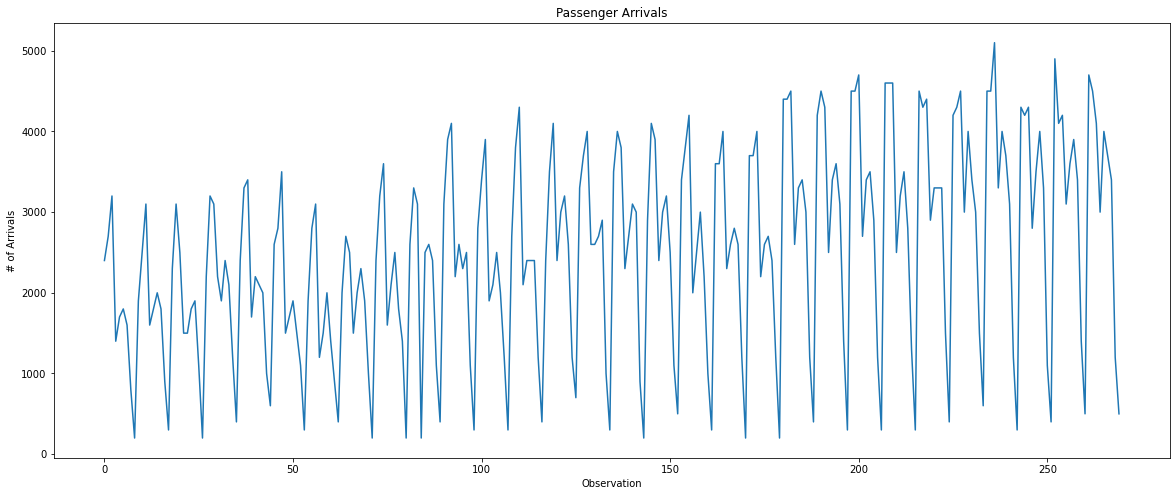

In [67]:
plt.figure(figsize=(20,8))
plt.plot(df_view['arrivals'])
plt.title("Passenger Arrivals")
plt.xlabel("Observation")
plt.ylabel("# of Arrivals")
plt.show()

In [73]:
t_stat, pvalue, lags, _, _, _ = sm.tsa.stattools.adfuller(df_view['arrivals'])
print(f" t stat: {t_stat}, pvalue: {pvalue}, lags used: {lags}")

 t stat: -1.1006609274720531, pvalue: 0.7148082629631284, lags used: 9
